In [4]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn import svm 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import pickle

In [5]:
# Collecting the data 
mnist = fetch_openml('mnist_784')

In [6]:
# Below command prints the description of the mnist dataset.
#print(mnist.DESCR)

In [7]:
# Each row consists of a 28x28 -> 784 pixels of a particular image.
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Target data to identify the image.
mnist.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [9]:
# Convert the mnist.data(dataframe) to numpy array to plot the images
image= mnist.data.to_numpy()


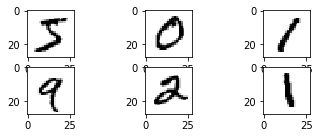

In [10]:
# Plotting the top 6 images
plt.subplot(431)
plt.imshow((image[0].reshape(28,28)), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(432)
plt.imshow(image[1].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(433)
plt.imshow(image[3].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(434)
plt.imshow(image[4].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(435)
plt.imshow(image[5].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')
plt.subplot(436)
plt.imshow(image[6].reshape(28,28), cmap=plt.cm.gray_r, 
interpolation='nearest')

In [11]:
# Array of random numbers in the range of 0 to 70000.
index_number= np.random.permutation(70000)

In [12]:
x1,y1=mnist.data.loc[index_number],mnist.target.loc[index_number]

In [13]:
x1.reset_index(drop=True,inplace=True)
y1.reset_index(drop=True,inplace=True)

In [14]:
x_train , x_test =   mnist.data[:60000],  mnist.data[60000:]
y_train , y_test = mnist.target[:60000],mnist.target[60000:]

In [15]:
x_test.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [16]:
svc = svm.SVC(gamma='scale',class_weight='balanced',C=100)

In [17]:
# Initialize the model and train it.
svc = svm.SVC(gamma='scale',class_weight='balanced',C=100)
svc.fit(x_train,y_train)

SVC(C=100, class_weight='balanced')

In [21]:
# Test it on the test dataset.
results=svc.predict(x_test)


In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
# accuracy
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=results), "\n")


accuracy: 0.9833 



In [24]:
from sklearn.metrics import accuracy_score, classification_report
print('Accuracy :',accuracy_score(y_test,results))
print(classification_report(y_test,results))

Accuracy : 0.9833
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [25]:
from sklearn.neighbors import KNeighborsClassifier

# train the dataset with knn algorithm 
knn = KNeighborsClassifier(n_neighbors=6,weights='distance')
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [26]:
results=knn.predict(x_test)

In [27]:
print('Accuracy :',accuracy_score(y_test,results))
print(classification_report(y_test,results))

Accuracy : 0.9709
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.97      0.97      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [28]:
# we will be using svm model for our streamlit app.
with open("../app/knn_classifier.pkl", "wb") as ec:
    pickle.dump(knn, ec)